# Challenge 1 - Basic Time Series


Time series manipulation is perhaps one of the most dreaded and brain-braking data munging activities. We need good tools to facilitate our jobs. 

In this challenge you will try to perform some basic data analysis and manipulations that require working with time series. Python, especially through Pandas, has great time series funcionality.

Instead of having a filled notebook where you (and me) can look at the answers I will first let you try to complete the challenge on your own. After you give it a go I will guide you through showing you my thought process and how I would solve some of the issues. This challenge will also be a test of how good you are at reading documentation. 

## Objective

* Calculate the monthly and annual total oil production from the Alba field in the North Sea.

### Data

In the following cell you will find a list with monthly oil production in **thousand barrels per day** for **Jan 2019 to Dec 2020** for the ALBA field. Two years worht of data. Each data point is recorded by months end.

* Source https://data-ogauthority.opendata.arcgis.com/pages/production

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

In [2]:
production = [12.66, 11.74, 11.04,11.13,11.36,10.21,11.01,4.97,6.46,9.66,9.89,
              9.84,8.27,8.47,8.45,8.04,7.99,8.55,7.70,7.60,4.76,7.74,8.17,8.06]


## Task 1. Transform de list into a Pandas series with a time series index. 

In [3]:
# Hints pd.Series, pd.date_range
series = pd.Series(data=production, 
                   index=pd.date_range(start=datetime(2019, 1, 31), 
                                       end=datetime(2020, 12, 31), 
                                       freq='1M'))
series

2019-01-31    12.66
2019-02-28    11.74
2019-03-31    11.04
2019-04-30    11.13
2019-05-31    11.36
2019-06-30    10.21
2019-07-31    11.01
2019-08-31     4.97
2019-09-30     6.46
2019-10-31     9.66
2019-11-30     9.89
2019-12-31     9.84
2020-01-31     8.27
2020-02-29     8.47
2020-03-31     8.45
2020-04-30     8.04
2020-05-31     7.99
2020-06-30     8.55
2020-07-31     7.70
2020-08-31     7.60
2020-09-30     4.76
2020-10-31     7.74
2020-11-30     8.17
2020-12-31     8.06
Freq: M, dtype: float64

## Task 2. Calculate total monthly production and plot

<AxesSubplot:>

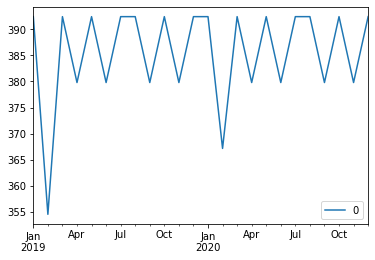

In [4]:
# Hint: days_in_month method
series_monthly_usage = pd.DataFrame(series).apply(lambda x: x.index.days_in_month * x.iloc[0])
series_monthly_usage.plot()

## Task 3. Calculate annual production and plot

In [5]:
# Hint: years method, and pd.DataFrame, pd.groupby
series.groupby(pd.Grouper(freq='1Y')).sum()

2019-12-31    119.97
2020-12-31     93.80
Freq: A-DEC, dtype: float64

# Bonus challenge: parse date times

It is common for analysts to receive data with different time formats. Pandas has powerful tools to parse complex dates. 
Try the next ones.

In [6]:
# pd.to_datetime, mind your format options
dates1 = ['15/03/18', '21/05/18'] #day, month, year
dates2 = ['15/18/03 23:11:05', '21/18/05 12:05:06'] #day, year, month, hour (24hrs), min, seconds 

In [7]:
pd.to_datetime(dates1, format='%d/%m/%y')

DatetimeIndex(['2018-03-15', '2018-05-21'], dtype='datetime64[ns]', freq=None)

In [8]:
pd.to_datetime(dates2, format='%d/%y/%m %H:%M:%S')

DatetimeIndex(['2018-03-15 23:11:05', '2018-05-21 12:05:06'], dtype='datetime64[ns]', freq=None)